### Context

Recently, there has been an increase in overspend on the plaform. To reduce the amount of overspend, team decided to create a new product where advertisers pay each time their ad appears in user's viewpoint rather than each time it is clicked on. In order to test the new product, we ran an A/B test. Half of the advertisers remained on the old product and half received the new product. the Goal of the analysis is to determine whether or not the experiment is a sucess

In [20]:
import pandas as pd
from pandasql import sqldf

In [2]:
df = pd.read_excel('analytical_take_home_data_v2 .xlsx')

In [3]:
df.head()

,treatment,company_size,campaign_spend,campaign_budget
0,False,small,10.4477,3.9035
1,False,medium,3.7776,1.9872
2,False,medium,46.1880,55.4523
3,False,small,6.6271,6.5136
4,False,small,92.3405,83.1018


In [17]:
print('There are total ' + str(df.shape[0]) + ' samples in the dataset')
print('')
tc_cnt = df.groupby(by = 'treatment').count().campaign_budget
print(tc_cnt)
print('')
print('Samples are evenly divided into test and control')

There are total 15474 samples in the dataset

treatment
False    7733
True     7741
Name: campaign_budget, dtype: int64

Samples are evenly divided into test and control


### Question 1 - How many campaigns have overspend of greater than 1% of their budget in the control group? in the treatment group?

In [18]:
df['over_spend'] = (df.campaign_spend - df.campaign_budget) / df.campaign_budget
df.head()

,treatment,company_size,campaign_spend,campaign_budget,over_spend
0,False,small,10.4477,3.9035,1.676495
1,False,medium,3.7776,1.9872,0.900966
2,False,medium,46.1880,55.4523,-0.167068
3,False,small,6.6271,6.5136,0.017425
4,False,small,92.3405,83.1018,0.111173


In [138]:
q1_output.dtypes

treatment                int64
Total Campaigns          int64
# Campaigns Overspend    int64
dtype: object

In [141]:
query = """
select treatment, count(*) as Total_Campaigns,
    sum(case when over_spend > 0.01 then 1 else 0 end) as overspends
from df
group by 1
"""

q1_output = sqldf(query)
q1_output.columns = [['treatment','Total Campaigns', '# Campaigns Overspend']]

q1_output



,treatment,Total Campaigns,# Campaigns Overspend
0,0,7733,5716
1,1,7741,5180


In [158]:
print('Treatment Group has % Overspend: ' + str(5180/7741))
print('Control Group has % Overspend: ' + str(5716/7733))
print('The difference between two groups are ' + str((0.7391697918013708 - 0.6691641906730397)/0.6691641906730397))

Treatment Group has % Overspend: 0.6691641906730397
Control Group has % Overspend: 0.7391697918013708
The difference between two groups are 0.10461647844293649


Total 3342 (43%) campaigns using the old product have overspent greater than 1% comparing to only 2972 (38%) in treatment group

In [144]:
print("computing 95% Confidence Interval....")
print("Confidence Interval for Treatment Group: (" + str(5180/7741 - 1.96*np.sqrt(5180/7741*(1-5180/7741)/7741)) + ", " + str(5180/7741 + 1.96*np.sqrt(5180/7741*(1-5180/7741)/7741)) + ")")
print("Confidence Interval for Control Group: (" + str(5716/7733 - 1.96*np.sqrt(5716/7733*(1-5716/7733)/7733)) + ", " + str(5716/7733 + 1.96*np.sqrt(5716/7733*(1-5716/7733)/7733)) + ")")
print(" ")
print("Significant @95%")


computing 95% Confidence Interval....
Confidence Interval for Treatment Group: (0.6586825289556402, 0.6796458523904392)
Confidence Interval for Control Group: (0.7293831630214129, 0.7489564205813286)
 
Significant @95%


### Question 2 - Was the new product effective at reducing overspend, and was it more or less effective depending on the company size? Put together an analysis describing how the treatment affected overspend

In [42]:
small_companies = df[df.company_size == 'small']
medium_companies = df[df.company_size == 'medium']
large_companies = df[df.company_size == 'large']

In [46]:
print('Total ' + str(small_companies.shape[0]) + ' small companies in the sample')
print(small_companies.groupby(by = 'treatment').count().campaign_budget)
print('samples are evenly divided into test and contorl in small companies')

print('')
print('Total ' + str(medium_companies.shape[0]) + ' medium companies in the sample')
print(medium_companies.groupby(by = 'treatment').count().campaign_budget)
print('samples are evenly divided into test and contorl in medium companies')

print('')
print('Total ' + str(large_companies.shape[0]) + ' large companies in the sample')
print(large_companies.groupby(by = 'treatment').count().campaign_budget)
print('samples are evenly divided into test and contorl in large companies')

Total 8901 small companies in the sample
treatment
False    4297
True     4604
Name: campaign_budget, dtype: int64
samples are evenly divided into test and contorl in small companies

Total 1427 medium companies in the sample
treatment
False    735
True     692
Name: campaign_budget, dtype: int64
samples are evenly divided into test and contorl in medium companies

Total 5146 large companies in the sample
treatment
False    2701
True     2445
Name: campaign_budget, dtype: int64
samples are evenly divided into test and contorl in large companies


#### Small Companies

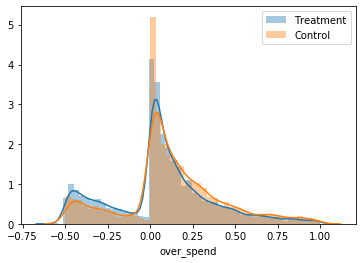

In [176]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(small_companies[(small_companies.treatment == 1) & (small_companies.over_spend <1)].over_spend, label = 'Treatment')
sns.distplot(small_companies[(small_companies.treatment == 0) & (small_companies.over_spend <1)].over_spend, label = 'Control')
plt.legend()

From chart, it seems more campaigns in Treatment group are with overspend ratio less than 0.01. 

In [148]:
query = """
select treatment, count(*) as Total_Campaigns,
    sum(case when over_spend > 0.01 then 1 else 0 end) as overspends
from small_companies
group by 1
"""

q2_small = sqldf(query)
q2_small.columns = [['treatment','Total Campaigns', '# Campaigns Overspend']]

q2_small



,treatment,Total Campaigns,# Campaigns Overspend
0,0,4297,3389
1,1,4604,3262


In [157]:
print ('small companies')
print('with old product, over spend rate is ' + str(3389/4297))
print('with new product, over spend rate is ' + str(3262 / 4606))
print('The difference between the two groups are '+ str((0.7886897835699325 - 0.7082066869300911)/0.7082066869300911))

small companies
with old product, over spend rate is 0.7886897835699325
with new product, over spend rate is 0.7082066869300911
The difference between the two groups are 0.11364351413951844


In [150]:
print("computing 95% Confidence Interval....")
print("Confidence Interval for Treatment Group: (" + str(3262 / 4606 - 1.96*np.sqrt(3262 / 4606*(1-3262 / 4606)/4606)) + ", " + str(3262 / 4606 + 1.96*np.sqrt(3262 / 4606*(1-3262 / 4606)/4606)) + ")")
print("Confidence Interval for Control Group: (" + str(3389/4297 - 1.96*np.sqrt(3389/4297*(1-3389/4297)/4297)) + ", " + str(3389/4297 + 1.96*np.sqrt(3389/4297*(1-3389/4297)/4297)) + ")")
print(" ")
print("Significant @95%")


computing 95% Confidence Interval....
Confidence Interval for Treatment Group: (0.6950782874390011, 0.7213350864211812)
Confidence Interval for Control Group: (0.776483407405195, 0.80089615973467)
 
Significant @95%


#### Medium Companies

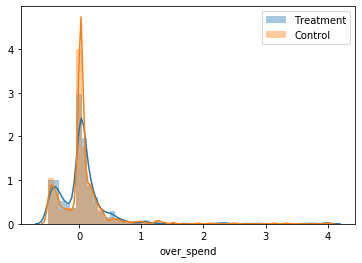

In [179]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(medium_companies[(medium_companies.treatment == 1)  ].over_spend, norm_hist = True, label = 'Treatment')
sns.distplot(medium_companies[(medium_companies.treatment == 0) ].over_spend, norm_hist = True, label = 'Control')

plt.legend()

From Chart, it seems more camapaigns from Control group with overspend ratio clustering close to 0

In [154]:
query = """
select treatment, count(*) as Total_Campaigns,
    sum(case when over_spend > 0.01 then 1 else 0 end) as overspends
from medium_companies
group by 1
"""

q2_medium = sqldf(query)
q2_medium.columns = [['treatment','Total Campaigns', '# Campaigns Overspend']]

q2_medium



,treatment,Total Campaigns,# Campaigns Overspend
0,0,735,452
1,1,692,414


In [156]:
print ('medium companies')
print('with old product, over spend rate is ' + str(452/(735)))
print('with new product, over spend rate is ' + str(414 / (692)))
print('The difference between the two groups is '+ str((0.6149659863945578 - 0.5982658959537572)/0.5982658959537572))

medium companies
with old product, over spend rate is 0.6149659863945578
with new product, over spend rate is 0.5982658959537572
The difference between the two groups is 0.027914160833415434


In [186]:
print("computing 95% Confidence Interval....")
print("Confidence Interval for Treatment Group: (" + str(414 / (692) - 1.96*np.sqrt(414 / (692)*(1-414 / (692))/692)) + ", " + str(414 / (692) + 1.96*np.sqrt(414 / (692)*(1-414 / (692))/692)) + ")")
print("Confidence Interval for Control Group: (" + str(452/(735) - 1.96*np.sqrt(452/(735)*(1-452/(735))/735)) + ", " + str(452/(735) + 1.96*np.sqrt(452/(735)*(1-452/(735))/735)) + ")")
print(" ")
print("Not Significant @95%")


computing 95% Confidence Interval....
Confidence Interval for Treatment Group: (0.5617384339061047, 0.6347933580014098)
Confidence Interval for Control Group: (0.5797866617443883, 0.6501453110447273)
 
Not Significant @95%


In [66]:
print('lower bound is: ' + str(211/692 - 1.96 * np.sqrt(211/692 * (1-211/692)/692)))
print('upper bound is: ' + str(211/692 + 1.96 * np.sqrt(188/735 * (1-211/692)/692)))

lower bound is: 0.27061198566459976
upper bound is: 0.3363297926256196


#### Large Companies

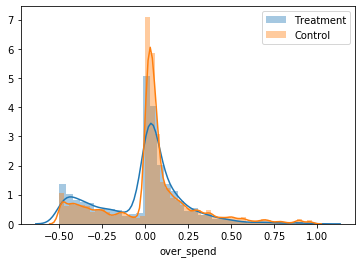

In [181]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(large_companies[(large_companies.treatment == 1) & (large_companies.over_spend <1)].over_spend, norm_hist = True, label = 'Treatment')
sns.distplot(large_companies[(large_companies.treatment == 0) & (large_companies.over_spend <1)].over_spend, norm_hist = True, label = 'Control')

plt.legend()

In [182]:
query = """
select treatment, count(*) as Total_Campaigns,
    sum(case when over_spend > 0.01 then 1 else 0 end) as overspends
from large_companies
group by 1
"""

q2_large = sqldf(query)
q2_large.columns = [['treatment','Total Campaigns', '# Campaigns Overspend']]

q2_large



,treatment,Total Campaigns,# Campaigns Overspend
0,0,2701,1875
1,1,2445,1504


In [187]:
print ('large companies')
print('with old product, over spend rate is ' + str(1875/2701))
print('with new product, over spend rate is ' + str(1504 / 2445))

print('The difference between the two groups are '+ str((0.6941873380229545 - 0.6151329243353784)/0.6151329243353784))

large companies
with old product, over spend rate is 0.6941873380229545
with new product, over spend rate is 0.6151329243353784
The difference between the two groups are 0.12851598501736947


In [189]:
print("computing 95% Confidence Interval....")
print("Confidence Interval for Treatment Group: (" + str(1504 / 2445 - 1.96*np.sqrt(1504 / 2445*(1-1504 / 2445)/2445)) + ", " + str(1504 / 2445 + 1.96*np.sqrt(1504 / 2445*(1-1504 / 2445)/2445)) + ")")
print("Confidence Interval for Control Group: (" + str(1875/2701 - 1.96*np.sqrt(1875/2701*(1-1875/2701)/2701)) + ", " + str(1875/2701 + 1.96*np.sqrt(1875/2701*(1-1875/2701)/2701)) + ")")
print(" ")
print("Significant Significant @95%")


computing 95% Confidence Interval....
Confidence Interval for Treatment Group: (0.5958462873599566, 0.6344195613108001)
Confidence Interval for Control Group: (0.6768109360463195, 0.7115637399995896)
 
Significant Significant @95%


In [69]:
print('lower bound is: ' + str(650/2445 - 1.96 * np.sqrt(650/2445 * (1-650/2445)/2445)))
print('upper bound is: ' + str(650/2445 + 1.96 * np.sqrt(650/2445 * (1-650/2445)/2445)))

lower bound is: 0.24833703638506163
upper bound is: 0.2833603051282308


### Question 3 - A product manager on the team is concerned that certain advertisers in the treatment group are entering lower budgets because they are wary of the new product. Provide some evvidence to support their suspicions, or show that any differences in budgets are likely due to random fluctuations

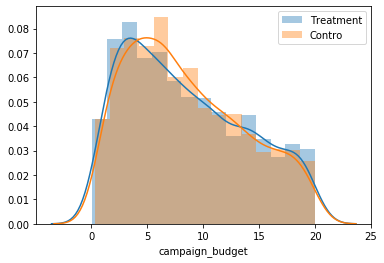

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(small_companies[(small_companies.treatment == 1)&(small_companies.campaign_budget < 20)].campaign_budget, label = 'Treatment')
sns.distplot(small_companies[(small_companies.treatment == 0)&(small_companies.campaign_budget < 20)].campaign_budget, label = 'Contro')

plt.legend()

In [74]:
small_companies.groupby(by = 'treatment').mean().campaign_budget

treatment
False    3538.655751
True     1585.479895
Name: campaign_budget, dtype: float64

In [191]:
small_companies.groupby(by = 'treatment').median().campaign_budget

treatment
False    28.98920
True     20.28825
Name: campaign_budget, dtype: float64

In [78]:
small_companies.groupby(by = 'treatment').var().campaign_budget

treatment
False    2.528770e+09
True     1.542813e+08
Name: campaign_budget, dtype: float64

In [67]:
print('calculating Z value...')
Z = (1585.479895 - 3538.655751) / np.sqrt(2.528770e+09 / 4297 + 1.542813e+08 / 4604)
print(Z)
print('significat @95%')

calculating Z value...
-2.4765308721886394
significat @95%


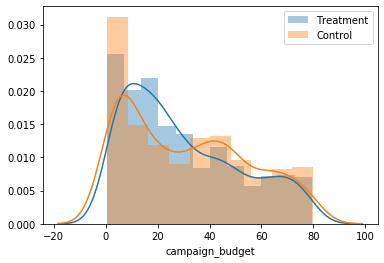

In [192]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(large_companies[(large_companies.treatment == 1)&(large_companies.campaign_budget < 80)].campaign_budget, label = 'Treatment')
sns.distplot(large_companies[(large_companies.treatment == 0)&(large_companies.campaign_budget < 80)].campaign_budget, label = 'Control')

plt.legend()


In [88]:
large_companies.groupby(by = 'treatment').mean().campaign_budget

treatment
False     5933.969190
True     17561.826014
Name: campaign_budget, dtype: float64

In [83]:
large_companies.groupby(by = 'treatment').median().campaign_budget

treatment
False    145.3752
True     129.8792
Name: campaign_budget, dtype: float64

In [202]:
large_companies.head()

,treatment,company_size,campaign_spend,campaign_budget,over_spend
6,False,large,411.0601,404.3652,0.016557
11,False,large,48001.4263,43440.5670,0.104991
12,False,large,105.8338,88.5289,0.195472
13,False,large,12.1176,11.6247,0.042401
17,False,large,18000.1220,14074.9006,0.278881


In [207]:
# Only keep those 2 standard deviation within mean

lge_companies_T = large_companies[large_companies.treatment == True]
lge_companies_C = large_companies[large_companies.treatment == False]
lge_companies_T_adj = lge_companies_T[(lge_companies_T.campaign_budget - lge_companies_T.campaign_budget.mean()) <= 3*lge_companies_T.campaign_budget.std()]
lge_companies_C_adj = lge_companies_C[(lge_companies_C.campaign_budget - lge_companies_C.campaign_budget.mean()) <= 3*lge_companies_C.campaign_budget.std()]




In [215]:
print("After removing large outliers...")
print("Treatment Group has average budget: " + str(lge_companies_T_adj.campaign_budget.mean()))
print("Control Group has average budget: " + str(lge_companies_C.campaign_budget.mean()))

After removing large outliers...
Treatment Group has average budget: 8247.860605829228
Control Group has average budget: 5933.969190410958


In [216]:
lge_companies_T_adj.shape

(2436, 5)

In [217]:
lge_companies_C.shape

(2701, 5)

In [218]:
lge_companies_T_adj.campaign_budget.var()

1927597940.1852813

In [219]:
lge_companies_C.campaign_budget.var()

2235824855.8874383

In [220]:
(8247 - 5933) / np.sqrt(1927597940/2436 + 2235824855.8874383 / 2701)

1.8185704564578022

###### Bootstrapping

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [100]:
B = 200
N1 = 2701
#N2 = 2445
X = large_companies[large_companies.treatment == 0].campaign_budget

In [103]:
individual_estimates = np.empty(B)
for b in range(B):
    sample = np.random.choice(X, size = N1)
    individual_estimates[b] = np.median(sample)
bmean = individual_estimates.mean()
bstd = individual_estimates.std()
lower = bmean + norm.ppf(0.025) * bstd
upper = bmean + norm.ppf(0.975) * bstd

In [104]:
print(lower)
print(upper)

135.1067410734627
153.0755329265373


In [105]:
B = 200
#N1 = 2701
N2 = 2445
X = large_companies[large_companies.treatment == 1].campaign_budget

In [106]:
individual_estimates = np.empty(B)
for b in range(B):
    sample = np.random.choice(X, size = N2)
    individual_estimates[b] = np.median(sample)
bmean = individual_estimates.mean()
bstd = individual_estimates.std()
lower = bmean + norm.ppf(0.025) * bstd
upper = bmean + norm.ppf(0.975) * bstd

In [107]:
print(lower)
print(upper)

115.90878327295451
142.11534272704552
